In [9]:
import numpy as np
import matplotlib.pyplot as plt
%run FB-messages_data_import.ipynb
%store -r sigmoid_value
%store -r Baseline
%store -r connections

In [5]:
stupid_baseline = [6451/num_connectins] * len(sigmoid_value) 

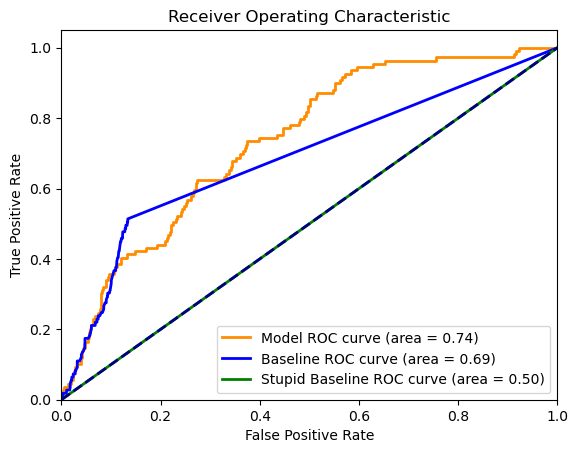

In [10]:
from sklearn.metrics import roc_curve, auc
# Compute FPR, TPR, and thresholds
y_true = connections
y_true[y_true == -1] = 0

# Compute ROC curve and AUC for sigmoid_value predictions
fpr1, tpr1, _ = roc_curve(y_true, sigmoid_value)
roc_auc1 = auc(fpr1, tpr1)

# Compute ROC curve and AUC for baseline predictions
fpr2, tpr2, _ = roc_curve(y_true, Baseline)
roc_auc2 = auc(fpr2, tpr2)

# Compute ROC curve and AUC for stupid baseline predictions
fpr3, tpr3, _ = roc_curve(y_true, stupid_baseline)
roc_auc3 = auc(fpr3, tpr3)

# Plot the ROC curve for all models
plt.figure()
plt.plot(fpr1, tpr1, color='darkorange', lw=2, label='Model ROC curve (area = %0.2f)' % roc_auc1)
plt.plot(fpr2, tpr2, color='blue', lw=2, label='Baseline ROC curve (area = %0.2f)' % roc_auc2)
plt.plot(fpr3, tpr3, color='green', lw=2, label='Stupid Baseline ROC curve (area = %0.2f)' % roc_auc3)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()